In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Conv2D, Conv2DTranspose
from tensorflow.keras import layers

/tmp/ipykernel_42045/144937039.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-04-15 18:15:02.777213: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-15 18:15:02.777248: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-15 18:15:02.777784: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable t

In [2]:
train_data = pd.read_csv('./Kannada-MNIST/train.csv')
test_data = pd.read_csv('./Kannada-MNIST/test.csv')

In [3]:
train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_images = train_data.iloc[:, 1:].values.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_images = test_data.iloc[:, 1:].values.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [5]:
test_images.shape

(5000, 28, 28, 1)

In [6]:
# Encoder
inputs = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2DTranspose(16, (3, 3), strides=2, activation='relu', padding='same')(x)
x = Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same')(x)
outputs = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model
autoencoder = Model(inputs, outputs)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()


2024-04-15 18:15:04.899208: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_transpose (Conv2DTr  (None, 14, 14, 16)        2320  

2024-04-15 18:15:04.914577: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-15 18:15:04.914606: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-15 18:15:04.916970: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-15 18:15:04.917002: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-15 18:15:04.917018: I external/local_xla/xla/stream_executor

In [7]:
autoencoder.fit(train_images, train_images, epochs=10, batch_size=32, shuffle=True, validation_data=(test_images, test_images))

Epoch 1/10


2024-04-15 18:15:06.309039: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-04-15 18:15:06.368192: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-15 18:15:06.575501: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-15 18:15:06.903862: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f8039659980 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-15 18:15:06.903887: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-04-15 18:15:06.906674: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1713219306.958787   42192 device_compiler.

1875/1875 [==============================] - 7s 3ms/step - loss: 0.0980 - val_loss: 0.0714
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0714 - val_loss: 0.0677
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0688 - val_loss: 0.0658
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0673 - val_loss: 0.0648
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0663 - val_loss: 0.0639
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0656 - val_loss: 0.0633
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0652 - val_loss: 0.0629
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0647 - val_loss: 0.0626
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0644 - val_loss: 0.0622
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0641 - val_los

In [8]:
def denoise_images(img):

    denoised_images = img + 0.1 * tf.random.normal(shape=img.shape)
    return denoised_images

In [9]:
# Predict (Denoise)
denoised_images = autoencoder.predict(test_images)

157/157 [==============================] - 0s 1ms/step


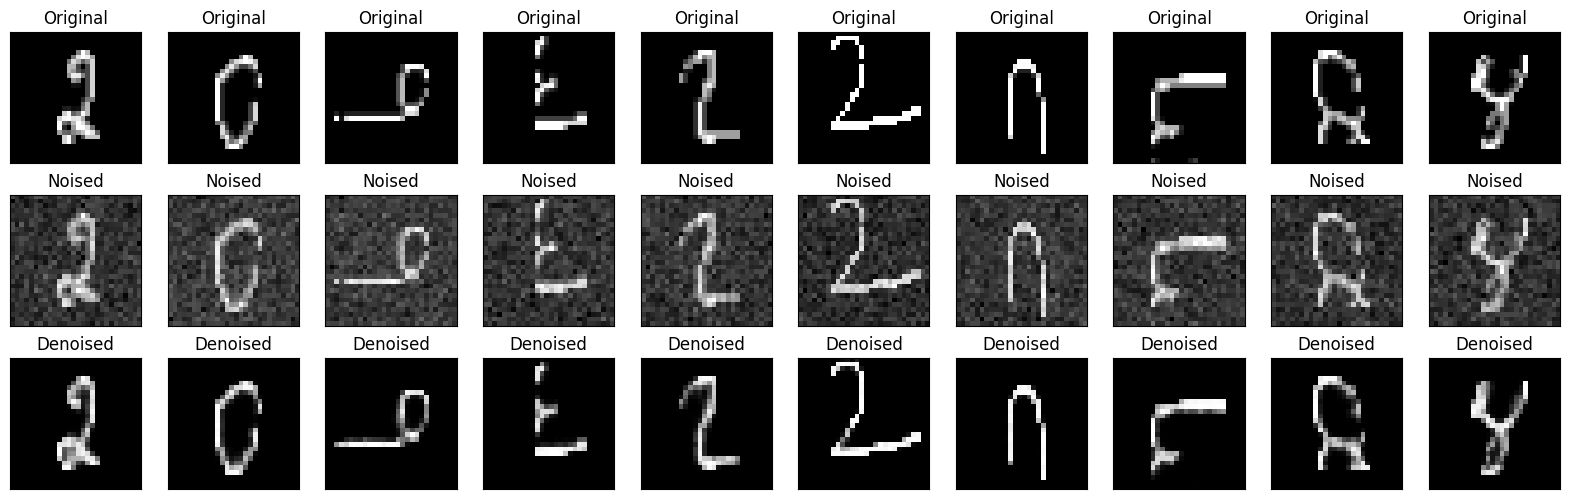

In [12]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):

    ax = plt.subplot(3, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoise_images(test_images[i].reshape(28, 28)), cmap='gray')
    plt.title("Noised")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_images[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.savefig("example.png")
plt.show()